* References:  **Tim Leung and Xin Li** - *Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications (2015)*

## Abstract

An Exponential Ornstein-Uhlenbeck process is a modification of the geometric Ornstein–Uhlenbeck process
developed previously by Dixit and Pyndick in a paper titled:
_"The stochastic behavior of commodity prices: Implications for valuation and hedging."_

Tim Leung, Xin Li in _"Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications" (2015)_ present the solution to the optimal timing problems for one-time entering and liquidating the position and also provide the 
ability to find optimal levels for infinite amount of trades based on Exponential Ornstein-Uhlenbeck process.

The following implementations and descriptions closely follow the work of Tim Leung: [Tim Leung and Xin Li Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications](https://www.amazon.com/Optimal-Mean-Reversion-Trading-Mathematical/dp/9814725919). Data used to showcase the module was chosen based on the example in the publication.

## Exponential Ornstein-Uhlenbeck process
The Exponential Ornstein-Uhlenbeck (XOU) process is defined the following way:


   $$ \xi_t = e^{X_t}, t \geq 0$$

where $X$ is the Ornstein-Uhlenbeck process.

>The definition of the OU process and the fitting procedure details are presented in **OU model notebook** (ou_model.ipynb)

In other words, $X$ is a *log-price* of a positive XOU
process $\xi$.

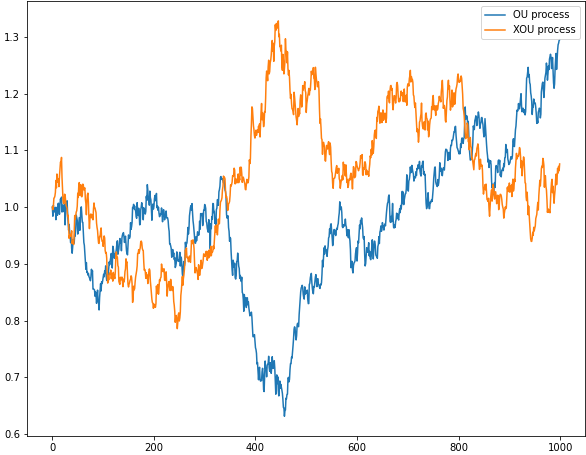

In [1]:
from IPython.display import Image
Image(filename='XOU_model/xou_vs_ou.png')

_Simulated OU ($\theta$ = 1, $\mu$ = 0.6, $\sigma$ = 0.2) and XOU ($\theta$ = 0, $\mu$ = 0.6, $\sigma$ = 0.2) processes paths._



The main parameters of the XOU model coincide with the parameters of the OU model:

* $\theta$ − long term mean level, all future trajectories of 𝑋 will evolve around a mean level 𝜃 in the long run.

* $\mu$ - the speed of reversion, characterizes the velocity at which such trajectories will regroup around $\theta$ in time.

* $\sigma$ - instantaneous volatility, measures the amplitude of randomness entering the system. Higher values imply more randomness.



To fit the XOU process to our data and find the optimal ratio between the two assets we
are using the same approach as we utilized for the OU process:
firstly, we are maximizing the average log-likelihood function with respect to model parameters, and secondly
choosing the $\beta^*$ that provides the maximum value of the said max log-likelihood function.

## Optimal stopping problem

> This approach presumes that the investor wants to commit only two trades: entering the position, and
    liquidating it.

First of all, let's assume that the investor already has a position the value of which follows the XOU process. When
the investor closes his position at the time $\tau$ he receives the value $\xi_{\tau}=e^{X_{\tau}}$ and pays a
constant transaction cost $c_s > 0$. To maximize the expected discounted value we need to solve
the optimal stopping problem:



$$V^{\xi}(x) = \underset{\tau \in T}{\sup} \mathbb{E}({e^{-r \tau} (e^{X_{\tau}} - c_s)| X_0 = x}),$$

where $T$ denotes the set of all possible stopping times and $r > 0$ is our subjective constant
discount rate. $V^{\xi}(x)$ represents the expected liquidation value accounted with $\xi$.

Current price plus transaction cost constitute the cost of entering the trade. After subtracting the found cost from
the expected optimal value of liquidation - $V(x)$ we can formalize the optimal entry problem:

$$ J^{\xi}(x) = \underset{\nu \in T}{\sup} \mathbb{E}({e^{-\hat{r} \tau} (V^{\xi}(X_{\nu}) - e^{X_{\nu}} - c_b)| X_0 = x})$$

$$\hat{r}>0, c_b > 0$$

To sum up this problem, we, as an investor, want to maximize the expected discounted difference between the current price
of the position - $e^{x_{\nu}}$ and its expected liquidation value $V^{\xi}(X_{\nu})$ minus transaction cost
$c_b$.

### The solutions:

Theorem 3.2 (p.54):

**The optimal liquidation problem admits the solution:**

$$V^{\xi}(x) = \begin{cases} (e^{b^{\xi*}} - c_s) \frac{F(x)}{F(b^{\xi*})} , & \mbox{if } x \in (-\infty,b^{\xi*})\\
  \\ e^x - c_s, &  \mbox{ otherwise}  \end{cases}$$

The optimal liquidation level $b^*$ is found from the equation:

$$e^b F(b) - (e^b - c_s)F'(b) = 0$$

Corresponding optimal liquidation time is given by

$$\tau^{\xi*} = \inf [t\geq0:X_t \geq b^{\xi*}] = \inf [t\geq0:\xi \geq e^{b^{\xi*}}]$$


Theorem 3.4 (p.54):

**The optimal entry timing problem admits the solution:**


$$J^{\xi}(x) = \begin{cases} P^{\xi}{F}(x),  & \mbox{if } x \in (-\infty,a^{\xi*})\\
    \\ V^{\xi}(x) - e^x - c_b, & \mbox{if } x \in [a^{\xi*}, d^{\xi*}]\\
    \\ Q^{\xi}{G}(x), & \mbox{if } x \in (d^{\xi*}, \infty)\end{cases}$$

The optimal entry interval $(a^{\xi*},d^{\xi*})$ is found using the respective equations:

$$G(d)(V^{\xi'}(d) - e^d) - G'(d)(V^{\xi}(d) - e^d - c_b) = 0$$
$$F(a)(V^{\xi'}(a) - e^a) - F'(a)(V^{\xi}(a) - e^a - c_b) = 0$$


Corresponding optimal entry time is given by


$$\nu_{a^{\xi*}, d^{\xi*}} = \inf [t\geq0:X_t \in [a^{\xi*}, d^{\xi*}]]$$


To summarize: the investor should enter the market when the price enters the interval
$[e^{a^{\xi*}}, e^{d^{\xi*}}]$ for the first time, and exit as soon as it reaches the price level
$e^{b{\xi*}}$.

## Optimal switching problem

> This approach presumes that the investor can commit an infinite number of trades.


If there is no limit on the number of times the investor will open or close the position, the sequential trading times
are modelled by the stopping times $\nu_1,\tau_1,\nu_2,\tau_2,... \in T$ such that

$$0\leq\nu_1\leq\tau_1\leq\nu_2\leq\tau_2\leq...$$

Where $\nu_i$ are times when the share of a risky asset was bought and $\tau_i$ - when it was sold. In the case
of pairs trading, we consider our spread as such an asset.


### The solutions:

In case of optimal switching the formulation of the problem will depend on the position we start with, as an investor, and subsequently - our first trading decision. 

**Zero position - Buy**

If we start from the zero position, our first action would be to decide when to buy the share of our asset. In our calculation we would
like to account for all our possible market re-entries and exits , so the problem is formulated in the following way:

$$\tilde{J}^{\xi}(x) = \underset{\Lambda_0}{\sup} \{ \mathbb{E}_x \sum^{\infty}_{n=1}[e^{-r\tau_n}h^{\xi}_s(X_{\tau_n}) - e^{-r\nu_n}h^{\xi}_b(X_{\nu_n})]\}$$

Where $\Lambda_0$ is the set of admissible times, and helper functions denoted as such:

$$h^{\xi}_s=e^x-c_s$$

$$and$$

$$h^{\xi}_s=e^x+c_b$$

**Existing position - Sell**

Vice-versa, if we start with pre-existing position in said risky asset our firt decision would be to decide on liquidation timing, therefore we have to account our first optimal "sell" value and then all of the possible market re-entries and exits:

$$\tilde{V}^{\xi}(x) = \underset{\Lambda_1}{\sup} \{ \mathbb{E}_x{e^{-r\tau_1}h^{\xi}_s(X_{\tau_1})+\sum^{\infty}_{n=2}[e^{-r\tau_n}h^{\xi}_s(X_{\tau_n}) - e^{-r\nu_n}h^{\xi}_b(X_{\nu_n})]} \}$$

With $\Lambda_1$ as the set of admissible times.

### The solution:

To find both optimal entry and liquidation switching levels we need to ensure that re-entering the market(or entering at all) is optimal. 

For that we need to establish the helper fumctions correlated with the entry and liquidation processes:

$$f_s(x):=(\mu\theta+\frac{1}{2}\sigma^2-r) - \mu x + r c_s e^{-x}$$
$$f_b(x):=(\mu\theta+\frac{1}{2}\sigma^2-r) - \mu x - r c_b e^{-x}$$


Theorem 3.7 (p.56):

**Under optimal switching approach it is optimal to re-enter the market if and only if all of the following conditions hold true:**

a) There are two distinct roots to $f_b:\ x_{b1},x_{b2}$

b) $\exists \tilde{a}^* \in (x_{b1},x_{b2})$ satisfying $F(\tilde{a}^*)e^{\tilde{a}^*}=F'(\tilde{a}^*)(e^{\tilde{a}^*}+c_b)$

c) The following inequality must hold true:

$$\frac{e^{\tilde{a}^*}+c_b}{F(\tilde{a}^*)}\geq\frac{b^{\xi*}-c_s}{F(b^{\xi*})}$$

In case any of the conditions are not met - re-entering the market is deemed not optimal it would be advised to exit
at the optimal liquidation price without re-entering in the case when the investor had already entered the market beforehand,
or don't enter the market at all in the case when he or she starts with a zero position.


## How to use the XOU module

For this module the most suitable input would be a logarithmized pre-built mean-reverting portfolio prices.

Both optimal stopping and optimal switching levels are used alike in determining the rules of our trading strategy:


* If not already entered, enter when the price reaches optimal entry level.

* If not already liquidated, liquidate when the price reaches optimal liquidation level.

However, the differenece lies in the applications of the two approaches. The optimal stopping usually 
has a much longer delay between the buy and sell levels are reached and offers a bigger gain than a one-time entry and liquidation using the optimal switching levels. The optimal switching levels, on the other hand, may provide a bigger cumulative gain by performing the trades multiple times during the same time period.


In [2]:
import arbitragelab.optimal_mean_reversion as omr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creating a class instance
example = omr.ExponentialOrnsteinUhlenbeck()

We are able to create the training data sample using the module itself:


In [4]:
# We establish our training sample
delta_t = 1/252
np.random.seed(30)
xou_example =  example.ou_model_simulation(n=1000, theta_given=1, mu_given=0.6,
                                           sigma_given=0.2, delta_t_given=delta_t)

Model fitting uses the same function structure as the OU module:

In [5]:
# Model fitting
example.fit(xou_example, data_frequency="D", discount_rate=0.05,
            transaction_cost=[0.02, 0.02])

Optimal stopping levels can be found separately via respective functions.

In [6]:
# Solving the optimal stopping problem
b = example.xou_optimal_liquidation_level()

a,d = example.xou_optimal_entry_interval()

In [7]:
print("Optimal liquidation level:", round(b,5),
      "\nOptimal entry interval:[",round(a, 5),",",round(d, 5),"]")


Optimal liquidation level: 1.28134 
Optimal entry interval:[ -8.19363 , 0.82046 ]


Both optimal levels can be found via the `optimal_switching_levels` function.

In [8]:
# Solving the optimal switching problem
d_switch, b_switch = example.optimal_switching_levels()

In [9]:
print ("Optimal switching liquidation level:", round(b_switch,5),
       "\nOptimal switching entry interval:[", round(np.exp(example.a_tilde), 5),",",round(d_switch, 5),"]")


Optimal switching liquidation level: 1.17959 
Optimal switching entry interval:[ 0.00028 , 0.97523 ]


To test the obtained results let's simulate the XOU process using the respective function.

In [10]:
xou_plot_data =  example.xou_model_simulation(n=1000, theta_given=1, mu_given=0.6,
                                              sigma_given=0.2, delta_t_given=delta_t)

To visualize the results we use the `xou_plot_levels` function. 

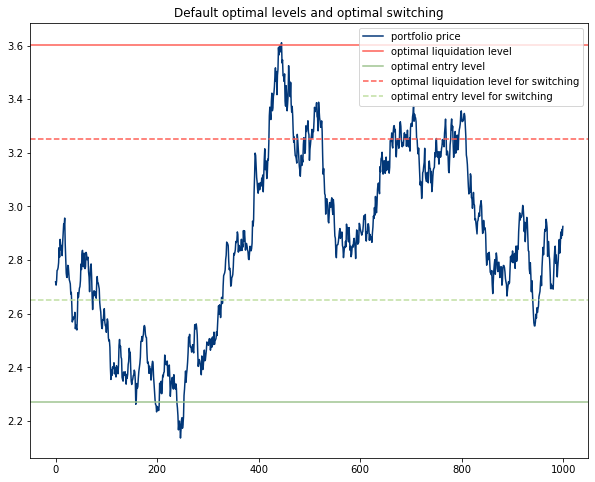

In [11]:
# Showcasing the results on the training data (pd.DataFrame)
fig = example.xou_plot_levels(xou_plot_data, switching=True)

# Adjusting the size of the plot
fig.set_figheight(8)
fig.set_figwidth(10)

In [12]:
# Or you can view the model statistics
example.xou_description(switching=True)

training period                              [None, None]
long-term mean                                    1.16509
speed of reversion                               0.391668
volatility                                       0.196553
fitting error                                 0.000110094
discount rates                               [0.05, 0.05]
transaction costs                            [0.02, 0.02]
beta                                                 None
optimal entry level                    [0.00028, 2.27154]
optimal liquidation level                         3.60145
optimal switching entry interval       [0.00028, 2.65177]
optimal switching liquidation level               3.25304
dtype: object

## Conclusion

This notebook describes the Exponential Ornstein-Uhlenbeck (XOU) model and how it is applied to mean reverting portfolios. The main goal of the notebook is to show the usage of the optimal stopping and optimal switching problems.

Both techniques were introduced by *Tim Leung and Xin Li* in [**Optimal Mean reversion Trading: Mathematical Analysis and Practical Applications**](https://www.amazon.com/Optimal-Mean-Reversion-Trading-Mathematical/dp/9814725919)

Key takeaways from the notebook:

* Exponential Ornstein-Uhlenbeck model is a great tool used to model the behavior of mean-reverting assets.

* Main idea behind the use of the  optimal levels is:
    
    * If position is not already entered, enter when the price reaches optimal entry level.

    * If position is not already liquidated, liquidate when the price reaches optimal liquidation level.
    
* An optimal stopping problem formulated for the XOU process allows us to maximize the expected discounted value of one-time entering or liquidating the position by finding the optimal price levels at which trades should be committed.

* An optimal switching problem, on the other hand, allows us to maximize the expected discounted value of infinite amount of trades(entering or liquidating the position). By finding the optimal price levels at which the repeated trades should be committed for the maximum overall gain. 

* The model should be considered as a building block for the problem with any finite number of sequential trades.

